# Table of contents
1. [Purpose](#purpose)
2. [Inputs](#inputs)
    * [2.1 GAP Species Range Maps](#subinput1)
    * [2.2 GAP Species Habitat Maps](#subinput2)
3. [Outputs](#outputs)
4. [Constraints](#constraints)
5. [Dependencies](#dependencies)
    * [5.1 Code Language](#codelanguage)
      * [5.1.1 package requirements](#packagerequirements)

6. [Code](#code)
    * [6.1 GAP Analytic Database Connection Functions](#code61)
    * [6.2 Connect to ScienceBase](#code62)
    * [6.3 Connect to GAP Analytic Database](#code63)
7. [Tests](#tests)
8. [Provenance](#provenance)
9. [Citations](#citations)
---

# GAP Habitat Restricted Species and their Protection Status
<br/>

## Purpose <a name="purpose"></a>
The U.S. Geological Survey Gap Analysis Project (GAP) created range and habitat maps for 1590 terrestrial vertebrates that are known to occur within the conterminous United States (CONUS) including 219 sub-species (McKerrow et al. 2018). GAP species maps individually or in any variety of species groupings have a number of uses to aid scientists, managers and policy makers in biodiversity research and planning. Comparing the extent of occurrence and habitat for amphibians, birds, mammals, and reptiles throughout CONUS can provide quantifiable insights into attributes that may highlight conservation concerns previously overlooked in assessments of species’ geographies.

An [analysis notebook](https://github.com/mjrubino/Range-vs-Habitat/blob/master/Range-vs-Habitat.ipynb) created to compare areal extents of GAP range and habitat maps generates a scatterplot and a CSV file illustrating the proportion of habitat within the range of each GAP species' maps.  

[Range vs. Habitat Scatterplot](https://github.com/mjrubino/Range-vs-Habitat/blob/master/Range-v-Habitat-Scatterplot.png)

Examining the scatterplot expectedly reveals when range size increases, habitat area increases, with the relationship accounting for approximately 82% of variability between the two. However, 18% cannot be explained merely by increasing area thereby highlighting differences and possible conservation decisions to be made using either habitat or range-based maps. Of special conservation interest may be species in the lower middle portion of the graph below the fitted line where range size is relatively large but habitat area is relatively small. Species with relatively small habitat areas are potentially “habitat restricted” and could be vulnerable to habitat loss across their range extent.

We were interested in exploring which species would be considered the most habitat restricted relative to their range size along with assessing their conservation status. We began by calculating the proportion of habitat within range by dividing total amount of predicted habitat area by range area. We then selected species whose percentage of habitat in range constitute the lowest five percent of values (lowest 5th percentile = 1.79%). A total of 82 species had percent habitat in range less than or equal to 1.79%. Of these 82 species 38 or 46.3% (including 7 amphibians, 4 birds, 14 mammals, and 13 reptiles) are considered vulnerable species using the [International Union for Conservation of Nature’s (IUCN)](https://www.iucnredlist.org/) threatened categories and/or [NatureServe Rounded Global Status rankings](http://help.natureserve.org/biotics/Content/Record_Management/Element_Files/Element_Tracking/ETRACK_Rank.htm).

## Inputs <a name="inputs"></a>
The code in this notebook examines the relationship between species' range and habitat maps developed by the U.S. Geological Survey Gap Analysis Project (McKerrow et al. 2018). All 1719 vertebrate species taxa (species and sub-species) in four groups (amphibians, birds, mammals, and reptiles) considered present in the conterminous US at some time in their life history are included in the analyses. The input processing species list could be altered to conduct a species subset analysis.
    
It utilizes individual species range and habitat data available on the [USGS ScienceBase data catalog](https://www.sciencebase.gov/catalog/) as attached files in each species' child item. These files are available programmatically using the Python language with the USGS developed [sciencebasepy API package](https://github.com/usgs/sciencebasepy).

* **U.S. Geological Survey Gap Analysis Project (GAP) Species Range Maps** <a name="subinput1"></a>  
Individual GAP species' range maps are available on ScienceBase as zip archive files containing Geographic Information System (GIS) vector data in shapefile format. The dataset is described here: https://www.sciencebase.gov/catalog/item/5951527de4b062508e3b1e79.

* **U.S. Geological Survey Gap Analysis Project (GAP) Species Habitat Maps** <a name="subinput2"></a>  
Individual GAP species' habitat maps are available on ScienceBase as zip archive files containing GIS raster data in TIF format. The dataset is described here: https://www.sciencebase.gov/catalog/item/527d0a83e4b0850ea0518326.

It also utilizes an SQL server database that was assembled by intersecting numerous spatial data layers including the [Protected Areas Database of the US](https://www.sciencebase.gov/catalog/item/5b030c7ae4b0da30c1c1d6de) (PAD-US), species habitat maps, boundary layers such as states, counties, LCCs, ecoregions, etc. At the time this workflow was developed, the database was available on a local server. Hence, all code references a local instance of this database. This code is only replicable given access to a local instance of the database.

* **U.S. Geological Survey Gap Analysis Project (GAP) Analytical Database** <a name="subinput1"></a>  
These analyses utilize the GAP Analytic database developed by Linda Schueck, Anne Davidson, and Leah Dunn at Boise State University. Information about access to a given instance of this database is pending. The database is described here: https://www.sciencebase.gov/catalog/item/5b736251e4b0f5d5787c61df.

Additionally, the code utilizes three files for processing range and habitat map data for each individual species - one available as a local file generated using a [Python notebook](https://github.com/mjrubino/Range-vs-Habitat/blob/master/Range-vs-Habitat.ipynb) and two others through the ScienceBase API.  

* **SpeciesRangevsHabitat.csv**  
This file contains the areal extent of range as well as habitat maps created by the USGS GAP project for each species. It should be generated using a [Python notebook](https://github.com/mjrubino/Range-vs-Habitat/blob/master/Range-vs-Habitat.ipynb) and accessible locally.


* **IUCN_Gap_.csv**  
This file is a list of all GAP modeled taxa, their scientific and common names and six-letter species codes and various conservation status information from IUCN including IUCN category. It is used to determine species vulnerability and as the species list source for programmitic looping. It is available as an attached file on ScienceBase here: https://www.sciencebase.gov/catalog/item/527d0a83e4b0850ea0518326.


* **ScienceBaseHabMapCSV_.csv**  
This file is a list of all GAP modeled taxa, their scientific and common names and six-letter species codes. It is used as the species list source for programmitic looping. It is available as an attached file on ScienceBase here: https://www.sciencebase.gov/catalog/item/5951527de4b062508e3b1e79.

## Outputs <a name="outputs"></a>
Charts visualizing the percent habitat in protected areas of CONUS under [four PAD-US protection status levels](https://www.usgs.gov/core-science-systems/science-analytics-and-synthesis/gap/science/pad-us-data-overview?qt-science_center_objects=0#qt-science_center_objects):  
<ul>
<ul>
    <li>Status 1: Biodiversity protection - natural disturbance permitted</li>
    <li>Status 2: Biodiversity protection - natural disturbance suppressed</li>
    <li>Status 3: Multiple use - extraction permitted</li>
    <li>Status 4: No known mandate for protection</li>
</ul>
</ul>

* [Habitat Restricted Species Protection Amounts by GAP Status:](#boxplot82)
A boxplot illustrating the percent habitat protection by GAP Status for all species considered habitat restricted - that is, species in the lowest 5th percentile of proportion of habitat area within their range extent.  

* [IUCN Conservation Concern Species Protection Amounts by GAP Status:](#boxplot19)
As above but including only species who are considered to be of conservation concern based on their [IUCN category](https://www.iucnredlist.org/) - DD: data deficient, VU: vulnerable, NT: near threatened, EN: endangered, or CR: critically endangered.  


## Constraints <a name="constraints"></a>
Range and habitat mapping constraints. See user constraints section on the USGS ScienceBase [GAP Species Habitat Maps](https://www.sciencebase.gov/catalog/item/527d0a83e4b0850ea0518326) page

## Dependencies <a name="dependencies"></a>
Code execution and output visualization dependencies

* **Code Language** <a name="codelanguage"></a>  
This code is written in Python 3.x. Earlier versions may be compatible given slight alterations in syntax and package components.
  * **Python package requirements** <a name="packagerequirements"></a>  
  The required packages for proper code execution inlclude:
    - Pandas version 0.2x or above
    - numpy version 1.14.x or above
    - re - regular expression package in Python
    - ElementTree (for extracting XML data from NatureServe web services API)
    - matplotlib (figures library) version 2.2.x or above
    - seaborn (statistical data visualization package) version 0.8 or above
    - sciencebasepy - USGS written Python package for interacting with the USGS ScienceBase API
    - pyodbc (for database connectivity) version 4.0 or above    


## Tests <a name="tests"></a>


## Provenance <a name="provenance"></a>

## Code <a name="code"></a>

### Define functions for accessing GAP Analytic database <a name="code61"></a>

In [1]:
#############################################################################################
########################## DB CONNECTION LOCAL FUNCTIONS ####################################
#############################################################################################


## --------------Cursor and Database Connections--------------------

def ConnectToDB(connectionStr):
    '''
    (str) -> cursor, connection

    Provides a cursor within and a connection to the database

    Argument:
    connectionStr -- The SQL Server compatible connection string
        for connecting to a database
    '''
    try:
        con = pyodbc.connect(connectionStr)
    except:
        connectionStr = connectionStr.replace('11.0', '10.0')
        con = pyodbc.connect(connectionStr)

    return con.cursor(), con

## ----------------Database Connection----------------------

def ConnectAnalyticDB():
    '''
    Returns a cursor and connection within the GAP analytic database.
    '''
    # Database connection parameters
    dbConStr = """DRIVER=SQL Server Native Client 11.0;
                    SERVER=CHUCK\SQL2014;
                    UID=;
                    PWD=;
                    TRUSTED_CONNECTION=Yes;
                    DATABASE=GAP_AnalyticDB;"""

    return ConnectToDB(dbConStr)


#############################################################################################
#############################################################################################
#############################################################################################

### Import required Python packages

In [2]:
import sciencebasepy, pyodbc, re
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import urllib
from datetime import datetime
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)

### Set local variables

In [3]:
analysisDir = 'C:/Data/USGS Analyses/'
workDir = analysisDir + 'Habitat-Restricted-Species/'

# ****** Static Range vs Habitat CSV File **********
#  Run SB-Range-vs-Habitat.py script to generate this file for a species list
HabRangeCSV = workDir + 'SpeciesRangevsHabitat.csv'

starttime = datetime.now()
timestamp = starttime.strftime('%Y-%m-%d')


### Connect to ScienceBase to get the IUCN CSV table<a name="code62"></a>

In [4]:
'''
    Connect to ScienceBase to pull down a species list with
    IUCN conservation status information in it.
    This uses the ScienceBase item for species habitat maps
    and searches for a CSV file with species info in it.
    The habitat map item has a unique id (527d0a83e4b0850ea0518326).
    If this changes, the code will need to be re-written.

'''
print('-'*50)
print('\n--> Connecting to ScienceBase to gather species IUCN criteria ...')

sb = sciencebasepy.SbSession()
habmapItem = sb.get_item("527d0a83e4b0850ea0518326")
# Make a regular expression variable for the IUCN csv file name pattern
fnp = 'IUCN_Gap.+'
for file in habmapItem["files"]:
    # Search for the file name pattern in the hab map item files dictionary
    fnMatch = re.search(fnp, file['name'])
    if fnMatch != None:
        try:
            dfGapIUCN = pd.read_csv(StringIO(sb.get(file["url"])))
            dfGapIUCN = dfGapIUCN.replace(np.nan, '', regex=True)
        except:
            print('!! Could not find a CSV file name match !!')


--------------------------------------------------

--> Connecting to ScienceBase to gather species IUCN criteria ...


#### Pull the IUCN data into a dataframe and calculate the lowest 5th percentile of species habitat in range proportion

In [5]:
# Get the Range-Habitat csv file as a dataframe
print('\n--> Loading Habitat in Range CSV ...')
dfHabRng = pd.read_csv(HabRangeCSV)

# Pull out only a few necessary columns
dfHabInRng = dfHabRng[['SpeciesCode','ScientificName','CommonName','AreaRange_km2','AreaHab_km2']]

# Calculate the amount of habitat in range
dfHabInRng['PropHabOfRange'] = dfHabInRng['AreaHab_km2'] / dfHabInRng['AreaRange_km2']

# Calculate the lowest 5th percentile of proportions
print('\n--> Getting species whose habitat in range is in lowest 5th percentile ...')
props = dfHabInRng['PropHabOfRange']
low5 = np.percentile(props, 5, interpolation='lower')
# Make a dataframe of the species < the lowest 5th percentile
dflow5 = dfHabInRng[dfHabInRng['PropHabOfRange']<=low5]


--> Loading Habitat in Range CSV ...

--> Getting species whose habitat in range is in lowest 5th percentile ...


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Combine with the IUCN dataframe to assemble info on protection status

NOTE: two species Monk Parakeet - Myiopsitta monachus and Cane Toad - Rhinella marinus are exotics which should be removed from the analyses

In [6]:
# Merge the lowest 5th percentile species df with the GAP IUCN df
# First, merge them to match full species only
# NOTE: IUCN does not assess subspecies therfore matches are only on full species
dfSppOnly_IUCN = pd.merge(left=dflow5, right=dfGapIUCN, how='inner',
                      left_on='SpeciesCode', right_on='gapSppCode')
# Now merge them keeping all records for species in the lowest 5th percentile
# that is, including all the subspecies from the GAP list
dfAllLow5_IUCN = pd.merge(left=dflow5, right=dfGapIUCN, how='left',
                      left_on='SpeciesCode', right_on='gapSppCode')
'''
    Manual removal of species from the list

'''
print('\n--> Removing exotic species from the list ...')
# First, set the index to SpeciesCode to make dropping rows easier
dfAllLow5_IUCN.set_index('SpeciesCode', inplace=True)
# Two of these species are exotics. Remove them from the analysis
# Drop the Monk Parakeet - Myiopsitta monachus and Cane Toad - Rhinella marinus
dfAllLow5_IUCN.drop(['bMOPAx','aCANEx'], inplace=True)

# Two other species have problems with their RATs. File management issues from
# the early days of model processing have persisted. Until these species' outputs
# are fixed, they will need to be removed manually
# They are Cliff Swallow and North American Racer (bCLSWx & rNARAx)
dfAllLow5_IUCN.drop(['bCLSWx','rNARAx'], inplace=True)

# Pull out the species codes which are the row index
hrSpp = dfAllLow5_IUCN.index


--> Removing exotic species from the list ...


### Connect to ScienceBase to get the Species Hab Map CSV

#### This CSV file has a column for NatureServe Global Sequential ID for each species which is necessary to access species' XMLs

In [7]:
'''

    Use the NatureServe API to get global and national
    conservation status rank codes for each of the habitat
    restricted species. The ROUNDED global status will be
    used to assess conservation status for these species
    but the global range and national range and rounded
    ranks will also be available for additional assessment.
    
    First, pull down the ScienceBase Hab Map CSV to find the
    NatureServe Global Sequential ID for each species.

'''

for file in habmapItem["files"]:
    # Search for the file name pattern in the hab map item files dictionary
    if file['name'].startswith('ScienceBaseHabMapCSV'):
        try:
            dfSppCSV = pd.read_csv(StringIO(sb.get(file['url'])))
        except:
            print('!! Could not find a CSV file name match !!')


Access the NatureServe web service API using a unique key

In [8]:
# NatureServe developer API access key ID
keyid = 'cd08be35-cef1-46ec-a402-f108541b600e'

### Loop through the species list and gather XML data for NatureServe consservation status ranks

In [9]:
# make an empty list to append to
ranklst = []
lstcols = ['SpeciesCode','GRank','RGRank','NRank','RNRank']

for sppCode in hrSpp:
    try:
        
        print('\n--> Connecting to NatureServe to get conservation status ...')
        
        
        # Get the NatureServe Global Sequential ID from the CSV dataframe
        NSid = dfSppCSV.loc[dfSppCSV['GAP_code'] == sppCode, 'Global_SEQ_ID'].item()
        # Get the NatureServe URL for the given species
        urlNS = "https://services.natureserve.org/idd/rest/ns/v1.1/globalSpecies/comprehensive?uid=ELEMENT_GLOBAL.2." + \
                     str(NSid) + "&NSAccessKeyId=" + keyid
        # Parse the XML holding species data using the URL above
        tree = ET.parse(urllib.request.urlopen(urlNS))
        root = tree.getroot()
        
        #allElements = [elem.tag for elem in root.iter()]
        
        ## Look for Global Status Ranks
        try:
            # find path of the globalStatus tag
            pathGlobStat = root.findall(".//{http://services.natureserve.org/docs/schemas/biodiversityDataFlow/1}globalStatus")
            # get the global rank code
            NSgs = pathGlobStat[0][0][0].text
            # get the rounded global rank code
            NSrgs = pathGlobStat[0][1][0].text
            if NSgs != None:
                print('--> Global Status Rank found')
            else:
                NSgs = ''
            if NSrgs != None:
                print('--> Rounded Global Status Rank found')
            else:
                NSrgs = ''
        except:
            NSgs = ''
            NSrgs = ''
        
        ## Look for National Status Ranks
        try:
            # find path of the nationalStatus tag
            pathNatStat = root.findall(".//{http://services.natureserve.org/docs/schemas/biodiversityDataFlow/1}nationalStatus[@nationCode='US']")
            # get the national status rank
            NSns = pathNatStat[0][0][0].text
            # get the rounded national status rank
            NSrns = pathNatStat[0][1][0].text
            if NSns != None:
                print('--> National Status Rank found')
            else:
                NSns = ''
            if NSrns != None:
                print('--> Rounded National Status Rank found')
            else:
                NSrns = ''
        except:
            NSns = ''
            NSrns = ''
        
        # Append info to the NatureServe list
        ranklst.append([sppCode,NSgs,NSrgs,NSns,NSrns])
        

    except:
        print('\n!!!! Had Problems With Connections to ScienceBase. Moving on to Next Species ...!!!!')

# Make the final dataframe from the appended list
dfNSRanks = pd.DataFrame(ranklst,columns=lstcols)


--> Connecting to NatureServe to get conservation status ...
--> Global Status Rank found
--> Rounded Global Status Rank found
--> National Status Rank found
--> Rounded National Status Rank found

--> Connecting to NatureServe to get conservation status ...
--> Global Status Rank found
--> Rounded Global Status Rank found
--> National Status Rank found
--> Rounded National Status Rank found

--> Connecting to NatureServe to get conservation status ...
--> Global Status Rank found
--> Rounded Global Status Rank found
--> National Status Rank found
--> Rounded National Status Rank found

--> Connecting to NatureServe to get conservation status ...
--> Global Status Rank found
--> Rounded Global Status Rank found
--> National Status Rank found
--> Rounded National Status Rank found

--> Connecting to NatureServe to get conservation status ...
--> Global Status Rank found
--> Rounded Global Status Rank found
--> National Status Rank found
--> Rounded National Status Rank found

--> Conne

--> Global Status Rank found
--> Rounded Global Status Rank found
--> National Status Rank found
--> Rounded National Status Rank found

--> Connecting to NatureServe to get conservation status ...
--> Global Status Rank found
--> Rounded Global Status Rank found
--> National Status Rank found
--> Rounded National Status Rank found

--> Connecting to NatureServe to get conservation status ...
--> Global Status Rank found
--> Rounded Global Status Rank found
--> National Status Rank found
--> Rounded National Status Rank found

--> Connecting to NatureServe to get conservation status ...
--> Global Status Rank found
--> Rounded Global Status Rank found
--> National Status Rank found
--> Rounded National Status Rank found

--> Connecting to NatureServe to get conservation status ...
--> Global Status Rank found
--> Rounded Global Status Rank found
--> National Status Rank found
--> Rounded National Status Rank found

--> Connecting to NatureServe to get conservation status ...
--> Global

Merge IUCN and NatureServe dataframes

In [10]:
## Merge IUCN and NatureServe dataframes
dfIUCN_NS = pd.merge(left=dfAllLow5_IUCN, right=dfNSRanks, 
                     how='left',
                     left_on='SpeciesCode', right_on='SpeciesCode')


Show the list of species whose proportion of habitat area in range extent is in the lowest 5th percentile, their IUCN category, their IUCN population trend, and their NatureServe status ranks. Note that IUCN only assesses full species so GAP taxa that are subspecies will not have an IUCN category or population trend.

In [12]:
dfShowIUCN = dfIUCN_NS[['ScientificName','CommonName','PropHabOfRange','iucnCategory','iucnPopulationTrend','GRank', 'RGRank', 'NRank','RNRank']]
dfShowIUCN

,ScientificName,CommonName,PropHabOfRange,iucnCategory,iucnPopulationTrend,GRank,RGRank,NRank,RNRank
0,Craugastor augusti,Barking Frog,0.011969,LC,stable,G5,G5,N4,N4
1,Eurycea robusta,Blanco Blind Salamander,0.005455,DD,unknown,G1Q,G1,N1,N1
2,Anaxyrus exsul,Black Toad,0.009460,VU,stable,G1,G1,N1,N1
3,Necturus alabamensis,Black Warrior River Waterdog,0.000790,EN,decreasing,G2,G2,N2,N2
4,Lithobates chiricahuensis,Chiricahua Leopard Frog,0.002613,VU,decreasing,G2G3,G2,N2N3,N2
5,Rana luteiventris,Columbia Spotted Frog,0.016665,LC,decreasing,G4,G4,N4,N4
6,Eurycea spelaea,Grotto Salamander,0.009946,LC,unknown,G4,G4,N4,N4
7,Smilisca fodiens,Lowland Burrowing Treefrog,0.015151,LC,stable,G4,G4,N1N2,N1
8,Lithobates yavapaiensis,Lowland Leopard Frog,0.003815,LC,decreasing,G4,G4,N4,N4
9,Ambystoma mabeei,Mabee's Salamander,0.015614,LC,decreasing,G4,G4,N4,N4


Select species that are of conservation concern based on IUCN categories and/or NatureServe global status ranks

In [13]:
#################################################################################################
# Select species that are of conservation concern based on
# IUCN categories AND/OR NatureServe rounded global ranks
 
IUCNlst = ['VU', 'EN', 'NT', 'DD', 'CR', 'EW']
NSlst = ['G1', 'G2', 'G3', 'T1', 'T2', 'T3']
dfCC = dfIUCN_NS[dfIUCN_NS['iucnCategory'].isin(IUCNlst) | dfIUCN_NS['RGRank'].isin(NSlst)]
#################################################################################################

Show the list of species considered to be of conservation concern using IUCN criteria:
* DD - Data deficient
* NT - Near threatened
* VU - Vulnerable
* EN - Endangered
* CR - Critically endangered

and NatureServe global status ranks:
* G1 - Critically imperiled (global)
* G2 - Imperiled (global)
* G3 - Vulnerable (global)
* T1 - Critically imperiled (infraspecific taxon)
* T2 - Imperiled (infraspecific taxon)
* T3 - Vulnerable (infraspecific taxon)

In [14]:
dfShowCC = dfCC[['ScientificName','CommonName','PropHabOfRange','iucnCategory','iucnPopulationTrend','RGRank']]
dfShowCC

,ScientificName,CommonName,PropHabOfRange,iucnCategory,iucnPopulationTrend,RGRank
1,Eurycea robusta,Blanco Blind Salamander,0.005455,DD,unknown,G1
2,Anaxyrus exsul,Black Toad,0.009460,VU,stable,G1
3,Necturus alabamensis,Black Warrior River Waterdog,0.000790,EN,decreasing,G2
4,Lithobates chiricahuensis,Chiricahua Leopard Frog,0.002613,VU,decreasing,G2
11,Lithobates onca,Relict Leopard Frog,0.008227,EN,decreasing,G1
12,Plethodon shenandoah,Shenandoah Salamander,0.014804,VU,stable,G1
13,Eurycea rathbuni,Texas Blind Salamander,0.006411,VU,stable,G1
17,Laterallus jamaicensis coturniculus,California Black Rail,0.016020,NaN,NaN,T1
26,Oceanodroma leucorhoa,Leach's Storm-petrel,0.005255,VU,decreasing,
33,Charadrius nivosus nivosus,Western Snowy Plover,0.005593,NaN,NaN,T3


### Connect to the GAP Analytic database to generate protection status amounts<a name="code63"></a>

In [15]:
'''

    Get the habitat protection percentages for each species using the
    GAP Analytic database and the species list gathered above.


'''

sppStr = ""

for spp in hrSpp:
    
    # Build the species list that will be passed to the SQL
    if spp != hrSpp[-1]:
        sppStr = sppStr + "tblTaxa.strUC = '" + spp + "' OR "
    else:
        sppStr = sppStr + "tblTaxa.strUC = '" + spp + "'"

# Build an SQL statement that uses the Boundary, PAD-US,
# and Taxa tables to return cell counts for each PAD status
# for each species/subspecies in the passed list
#
print ("+"*50)
print ("\n Querying the Analytical DB to Calculate Species' Protection Percentages ....")


sql = """WITH 
boundary AS 
	(SELECT padus1_4.gap_sts, lu_boundary.value
	FROM   padus1_4
	INNER JOIN lu_boundary ON padus1_4.revoid = lu_boundary.padus1_4
	),

species AS
	(SELECT	lu_boundary_species.boundary, 
		tblTaxa.strUC, 
		lu_boundary_species.count
	FROM	lu_boundary_species
	INNER JOIN tblTaxa ON lu_boundary_species.species_cd = tblTaxa.strUC
	WHERE {0}
	)

SELECT	species.strUC as SppCode, 
	boundary.gap_sts as PADStatus, 
   sum(species.count) * 0.0009 as km2  
FROM	boundary
INNER JOIN species ON boundary.value = species.boundary 
WHERE boundary.gap_sts < 4
GROUP BY strUC, gap_sts
ORDER By strUC, gap_sts"""

## Connect to the Analytic Database
cur, conn = ConnectAnalyticDB()
strSQL = sql.format(sppStr)
dfSelect = pd.read_sql(strSQL, conn)

++++++++++++++++++++++++++++++++++++++++++++++++++

 Querying the Analytical DB to Calculate Species' Protection Percentages ....


### Pull together species protection by GAP status data and maniuplate dataframes for plotting

In [16]:
# Make a series that is the area sum (status 1-3 only) for each spp code
sAreaSum = dfSelect.groupby(['SppCode'])['km2'].sum()
# Make it a dataframe
dfSum = pd.DataFrame(sAreaSum)
# Round these numbers to 3 decimals to prevent strange math latter
dfSum = dfSum.round(3)
# Rename PADCount column to AreaSum1-3 and reset the index
dfSum.rename(columns={'km2':'AreaSum1-3'}, inplace=True)
dfSum = dfSum.reset_index()

# Merge this dataframe with the dfHabInRng dataframe made from the CSV
# file compiled for range and habitat areas in order to get the total
# habitat amount for each species. This will be used to calculate the 
# appropriate amount of habitat on GAP status 4 lands - that is, all
# the habitat that IS NOT ON GAP status 1, 2, or 3 lands
# First, pull out only the necessary columns from the dfHabInRng dataframe
dfHabTotal = dfHabInRng[['SpeciesCode','AreaHab_km2']]
# Round the total habitat area numbers to 3 decimals for latter math
dfHabTotal['AreaHab_km2'] = dfHabTotal['AreaHab_km2'].round(3)
dfMerge1 = pd.merge(left=dfSum,right=dfHabTotal,how='left',
                   left_on='SppCode',right_on='SpeciesCode')

# Drop the extra species code column, add a status column which will be
# all status 4, and calculate the area of status 4 habitat
dfMerge1.drop('SpeciesCode', axis=1, inplace=True)
dfMerge1['PADStatus'] = '4'
dfMerge1['km2'] = dfMerge1['AreaHab_km2'] - dfMerge1['AreaSum1-3']
# Now rearrange and rename some columns to prepare for appending with SQL dataframe
dfAppend = dfMerge1.drop(['AreaHab_km2','AreaSum1-3'], axis=1)
# Append with the SQL CSV dataframe dfSelect then calculate a total habitat area in km2
dfHabStatus = dfSelect.append(dfAppend, sort=False, ignore_index=True)
dfHabStatus['Total_km2'] = dfHabStatus['km2'].groupby(dfHabStatus['SppCode']).transform('sum')

# Calculate the percentage each status is relative to the total area for the species
dfHabStatus['PADPercent'] = (dfHabStatus['km2']/dfHabStatus['Total_km2'])*100
# Pivot the dataframe on PAD status to get them into columns
dfPivot = dfHabStatus.pivot_table(values='PADPercent',
                           index=['SppCode'],
                           columns=['PADStatus'])
# Rename the PAD status columns
dfPivot.rename(columns={'1':'Status 1','2':'Status 2',
                        '3':'Status 3','4':'Status 4'}, inplace=True)

# Calculate the percentage  status 1 and 2 combined
dfPivot['Status 1 & 2'] = dfPivot['Status 1'] + dfPivot['Status 2']
# Reset the index to a new dataframe
dfSppPAD = dfPivot.reset_index()
# Now get scientific and common names from dfHabInRng
dfSppPAD = pd.merge(left=dfSppPAD,right=dfHabInRng,how='left',
                    left_on='SppCode',right_on='SpeciesCode')
# Rename common name and scientific name columns for later merging with dfCC dataframe
dfSppPAD.rename(columns={'CommonName':'ComName', 'ScientificName':'SciName'},inplace=True)
# Reorder columns
dfSppPAD = dfSppPAD[['SppCode','SciName','ComName',
                   'Status 1','Status 2','Status 1 & 2',
                   'Status 3','Status 4']]
# Make another dataframe of PAD status percentages just for the species
# whose IUCN category and/or NatureServe rounded global rank attributes them
# as species of conservation concern
dfCCStatus = pd.merge(left=dfCC, left_on='SpeciesCode',
                      right=dfSppPAD, right_on='SppCode',
                      how='inner',left_index=True,right_index=False)
dfCCStatus = dfCCStatus[['SppCode','ScientificName','CommonName',
                   'Status 1','Status 2','Status 1 & 2',
                   'Status 3','Status 4']]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Set various plotting variables


--> Plotting species habitat protection percentage by GAP status ...


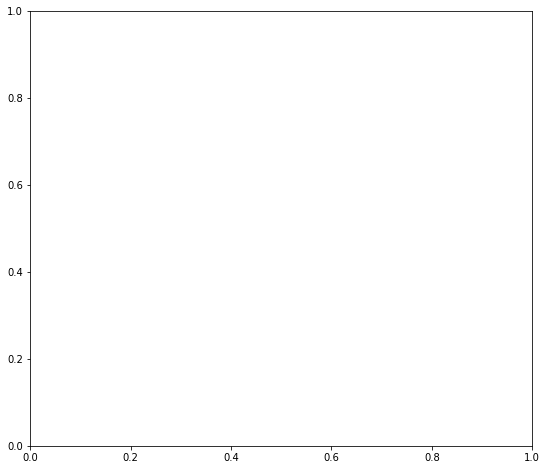

In [17]:
'''

    Start manipulating the dataframe and
    plotting boxplots using the Seaborn package

'''
print('\n--> Plotting species habitat protection percentage by GAP status ...')
# A version WITH combined Status 1 & 2 percentages for ALL habitat restricted species
dfmeltAll = dfSppPAD.melt(id_vars = 'SppCode',
                  value_vars = ['Status 1 & 2',
                                'Status 3','Status 4'],
                  var_name = 'GAP Protection Status',
                  value_name = 'Percent Habitat Protected')
# A version WITHOUT combined Status 1 & 2 percentages for only habitat restricted
# species of conservation concern based on IUCN and NatureServe status ranks
dfmeltCC = dfCCStatus.melt(id_vars = 'SppCode',
                  value_vars = ['Status 1','Status 2',
                                'Status 3','Status 4'],
                  var_name = 'GAP Protection Status',
                  value_name = 'Percent Habitat Protected')


fig1, ax1 = plt.subplots(figsize=(9,8))
# Make a color palette for each GAP status category
cp = {'Status 1':'#66cc00','Status 2':'#007b0c',
      'Status 1 & 2':'#4b5e26',
      'Status 3':'#aab256','Status 4':'#B5c6c9'}
# Subset the color palette for only Status 1&2, 3, and 4
cp3 = {k:cp[k] for k in ('Status 1 & 2','Status 3','Status 4') if k in cp}
# Subset the color palette for all statuses EXCEPT 1&2
cp4 = {k:cp[k] for k in ('Status 1','Status 2','Status 3','Status 4') if k in cp}

### Create a boxplot of percent habitat area by protection status for all habitat restricted species <a name="boxplot82"></a>

In [18]:
# Plot percent habitat protected by GAP status for ALL species in the lowest 5th percentile
a1 = sns.boxplot(data = dfmeltAll,
                x = 'GAP Protection Status',
                y = 'Percent Habitat Protected',
                width=0.35,
                palette=cp3,
                ax=ax1)
a1.set_title('Habitat Protection by GAP Status for ' + str(len(dfSppPAD)) + 
             ' Habitat Restricted Species', fontsize=12)

Text(0.5,1,'Habitat Protection by GAP Status for 82 Habitat Restricted Species')

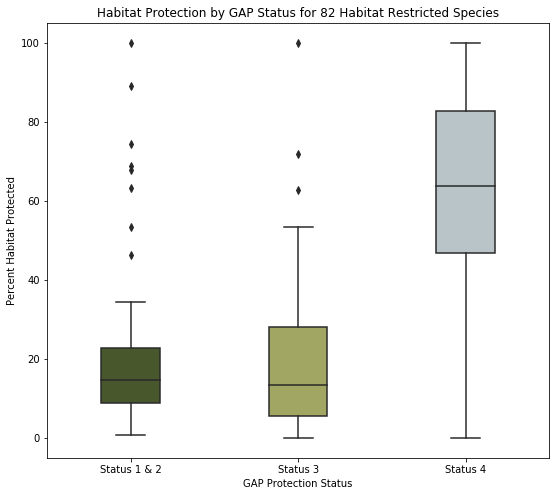

In [22]:
fig1

### Create a boxplot of percent habitat area by protection status for IUCN species of concern <a name="boxplot19"></a>

Text(0.5,1,'Habitat Protection by GAP Status for 38 Habitat Restricted Species of Conservation Concern')

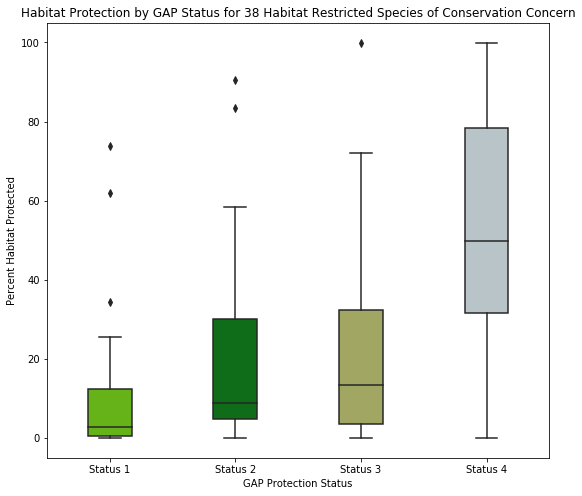

In [19]:
# Plot protection by status ONLY for species of conservation concern from IUCN & NatureServe
fig2, ax2 = plt.subplots(figsize=(9,8))
a2 = sns.boxplot(data = dfmeltCC,
                x = 'GAP Protection Status',
                y = 'Percent Habitat Protected',
                width=0.35,
                palette=cp4,
                ax=ax2)
a2.set_title('Habitat Protection by GAP Status for ' + str(len(dfCCStatus)) + 
             ' Habitat Restricted Species of Conservation Concern', fontsize=12)


In [20]:
endtime = datetime.now()
delta = endtime - starttime
print("+"*35)
print("Processing time: " + str(delta))
print("+"*35)

+++++++++++++++++++++++++++++++++++
Processing time: 0:26:19.634777
+++++++++++++++++++++++++++++++++++


## Citations <a name="citations"></a>

Beresford AE, GM Buchanan, PF Donald, SHM Butchart, LDC Fishpool, et al. (2011) Poor overlap between the distribution of protected areas and globally threatened birds in Africa. Animal Conservation 14: 99–107. http://doi.wiley.com/10.1111/j.1469-1795.2010.00398.x

Freckleton, RP, D Noble, and TJ Webb. (2006) Distributions of habitat suitability and the abundance-occupancy relationship. The American Naturalist 167:260-275. https://doi.org/10.1086/498655

Gaston KJ, and RA Fuller. (2009) The sizes of species' geographic ranges. Journal of Applied Ecology 46:1-9.  https://doi.org/10.1111/j.1365-2664.2008.01596.x

Graham, CH, and RJ Hijmans. (2006) A comparison of methods for mapping species ranges and species richness. Global Ecology and Biogeography 15:578-587.  https://doi.org/10.1111/j.1466-8238.2006.00257.x

Harris, G, and SL Pimm. (2008) Range size and extinction risk in forest birds. Conservation Biology, 22, 163-171. https://doi.org/10.1111/j.1523-1739.2007.00798.x

Jetz, W, CH Sekercioglu, and JEM Watson. (2008) Ecological correlates and conservation implications of overestimating species geographic ranges. Conservation Biology, 22, 110-119. https://doi.org/10.1111/j.1523-1739.2007.00847.x

McKerrow, AJ, NM Tarr, MJ Rubino, and SG Williams. (2018) Patterns of species richness hotspots and estimates of their protection are sensitive to spatial resolution. Diversity and Distributions 24:1461-1477, https://doi.org/10.1111/ddi.12779

Rondinini, C, M Di Marco, F Chiozza, G Santulli, D Baisero, P Visconti, and L Boitani. (2011). Global habitat suitability models of terrestrial mammals. Philosophical Transaction of the Royal Society B: Biological Sciences, 366, 2633-2641. https://doi.org/10.1098/rstb.2011.0113